In [0]:
#Importar bibliotecas pandas e train_test_split
#importar base de dados e dividi-la entre previsores e classe

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
base = pd.read_csv("Credit.csv")

In [0]:
base.head()

In [0]:
previsores = base.iloc[:,0:20].values
classe = base.iloc[:,20].values

In [0]:
#Importando GaussianNB e o LabelEncoder
#GaussianNB implementa o algoritmo gaussiano Naive Bayes para classificação. 
#A probabilidade dos recursos é assumida como gaussiana:
#O LabelEncoder transforma rótulos não numéricos em rótulos numéricos.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [0]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [0]:
#treinando Base de dados

In [0]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [29]:
#Criando objeto GaussianNB
#Treinando esse objeto
nb = GaussianNB()
nb.fit(X_treinamento,y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#Testando Modelo
previsao = nb.predict(X_teste)

In [0]:
#Criando matriz confusão para verifiar a quantidade de acertos do modelo

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(y_teste, previsao)
taxaAcerto = accuracy_score(y_teste,previsao)

In [39]:
confusion

array([[ 41,  45],
       [ 42, 172]])

In [40]:
taxaAcerto

0.71

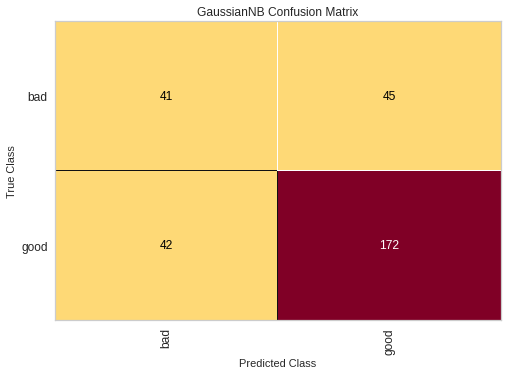

In [50]:
#Visualizando os dados com yellowBrick
from yellowbrick.classifier import ConfusionMatrix

visualization = ConfusionMatrix(nb)
visualization.fit(X_treinamento,y_treinamento)
visualization.score(X_teste,y_teste)
visualization.poof()


In [0]:
#Prevendo tentativa de fraude com novo usuario

In [0]:
novo_credito = pd.read_csv("NovoCredit.csv")

In [56]:
novo_credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [0]:
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder.fit_transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder.fit_transform(novo_credito[:,19])

In [59]:
# Prevendo a possibilidade de credito para um novo usuario
nb.predict(X=novo_credito)

array(['good'], dtype='<U4')